In [15]:
# import all the essential libraries


import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from numpy import array, asarray, zeros
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score



[nltk_data] Downloading package stopwords to C:\Users\Shahin
[nltk_data]     Kaushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
fake_news=pd.read_csv("Fake.csv")
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [17]:
true_news=pd.read_csv("True.csv")
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_news["class"]=0  # class =0 for fake news
true_news["class"]=1   # class =1 for true news

In [19]:
fake_news

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [20]:
true_news.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [21]:
true_news.shape

(21417, 5)

In [22]:
fake_news.shape

(23481, 5)

In [23]:
df=pd.concat([fake_news,true_news],axis=0)

In [24]:
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [25]:
df.shape

(44898, 5)

In [26]:
df=df.drop(["title","subject","date"],axis=1)

In [27]:
print(df)

                                                    text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1
21413  LONDON (Reuters) - LexisNexis, a provider of l...      1
21414  MINSK (Reuters) - In the shadow of disused Sov...      1
21415  MOSCOW (Reuters) - Vatican Secretary of State ...      1
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1

[44898 rows x 2 columns]


In [28]:
df.columns

Index(['text', 'class'], dtype='object')

In [29]:
df.reset_index(inplace=True)

In [30]:
df.drop(["index"],axis=1,inplace=True)

In [31]:
df.sample(10)

,text,class
20309,"We don t want to jump to any conclusions, so w...",0
42301,"ANKARA (Reuters) - Turkey, Iran and Iraq may h...",1
8901,Harney County resident Jarvis Kennedy has a me...,0
43631,"MONTEVIDEO (Reuters) - Lucia Topolansky, a Uru...",1
6045,Donald Trump is very upset at the judge overse...,0
21428,Roseberg residents and families of victims are...,0
42121,BEIJING (Reuters) - Chinese President Xi Jinpi...,1
39426,DHAKA (Reuters) - A pilot with the Bangladesh ...,1
27400,WASHINGTON (Reuters) - The White House said it...,1
39333,DAKAR (Reuters) - A long-awaited multi-nationa...,1


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def data_cleaning(text):
    
    text = text.lower()
    text=re.sub('\[.*?\]',"",text)
    text=re.sub("\\W"," ",text)
    text =re.sub('https?:://\S+|www\.\S+', '', text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\w*","",text)
    

    return text


<>:12: SyntaxWarning: invalid escape sequence '\['
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:18: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\['
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:18: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Shahin Kaushar\AppData\Local\Temp\ipykernel_16432\3220801130.py:12: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]',"",text)
C:\Users\Shahin Kaushar\AppData\Local\Temp\ipykernel_16432\3220801130.py:14: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?:://\S+|www\.\S+', '', text)
C:\Users\Shahin Kaushar\AppData\Local\Temp\ipykernel_16432\3220801130.py:18: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub("\w*\d\w*","",text)
[nltk_data] Downloading package stopwords to C:\Users\Shahin
[nltk_data]     Kaushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
import swifter
df["text"] = df["text"].swifter.apply(data_cleaning)

Pandas Apply:   0%|          | 0/44898 [00:00<?, ?it/s]

In [34]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [35]:
x=df["text"]
y=df["class"]

In [36]:
x

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday  it was revealed that former milwauk...
3        on christmas day  donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
44893    brussels  reuters    nato allies on tuesday we...
44894    london  reuters    lexisnexis  a provider of l...
44895    minsk  reuters    in the shadow of disused sov...
44896    moscow  reuters    vatican secretary of state ...
44897    jakarta  reuters    indonesia will buy  sukhoi...
Name: text, Length: 44898, dtype: object

In [62]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

In [37]:
x.shape

(44898,)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
x_train

34830    seoul  reuters    south korea predicted on tue...
6018     beebe  arkansas mayor  mike robertson  loves j...
42549    new york  reuters    eighty percent of the pow...
8670     when the black lives matter movement started g...
27243    washington  reuters    the trump administratio...
                               ...                        
11284                                                     
44732    london tokyo  reuters    british prime ministe...
38158    berlin  reuters    chancellor angela merkel sa...
860      jesus f cking christ our president  is a moron...
15795    if she s not toast now then we re in bigger tr...
Name: text, Length: 33673, dtype: object

In [40]:
x_train.shape

(33673,)

In [41]:
x_test.shape

(11225,)

# wordcloud

In [42]:
from wordcloud import WordCloud

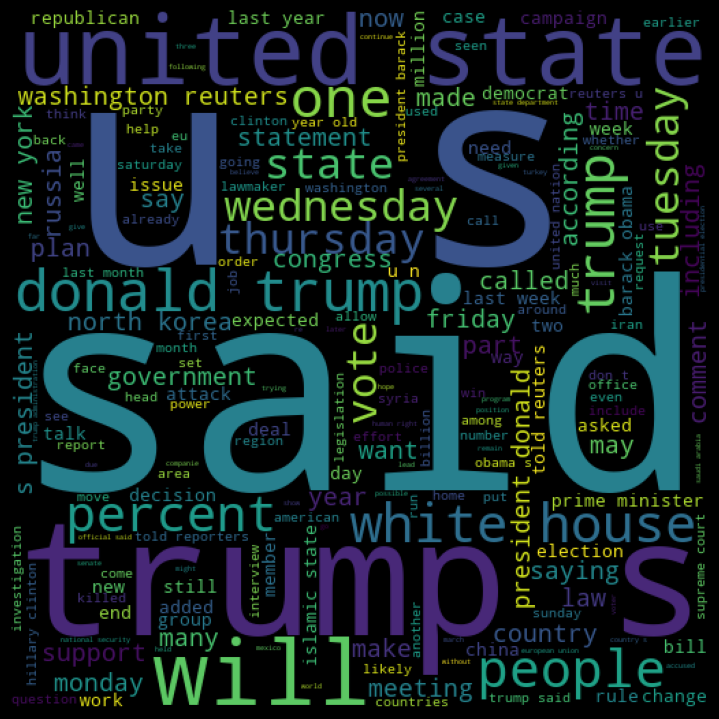

In [43]:
real=' '.join(list(df[df['class']==1]['text']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

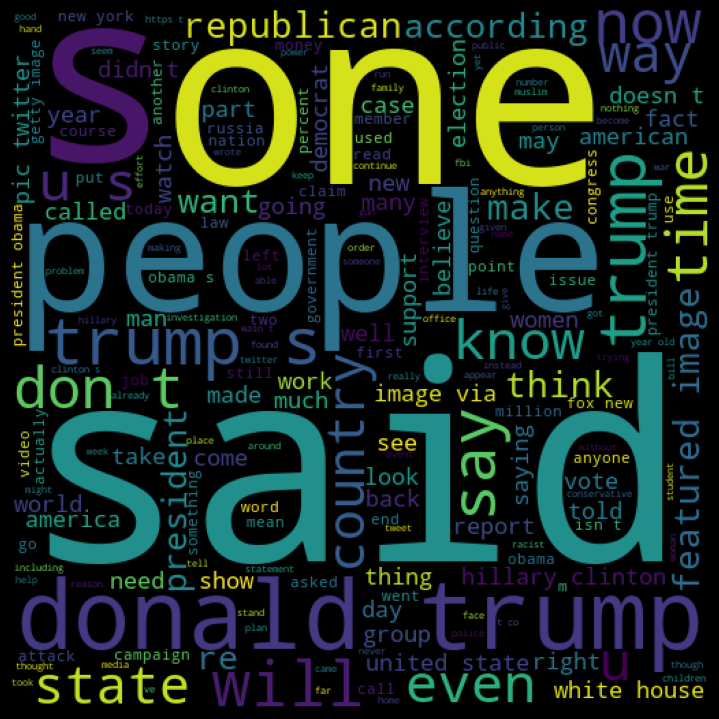

In [44]:
fake=' '.join(list(df[df['class']==0]['text']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [45]:
vectorizer=TfidfVectorizer(max_features=20000)
xvtrain=vectorizer.fit_transform(x_train)
xvtest=vectorizer.transform(x_test)


In [68]:
xvtrain_arr=xvtrain.toarray()
xvtrain_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
xvtest_arr=xvtest.toarray()
xvtest_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [47]:
lr.fit(xvtrain,y_train)

LogisticRegression(max_iter=1000)

In [48]:
lr_prediction =lr.predict(xvtest)

In [70]:
lr_prediction.size

11225

In [49]:
lr.score(xvtest,y_test)

0.9860133630289533

In [50]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_prediction))

Logistic Regression Accuracy: 0.9860133630289533


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3, max_features= 0.25, max_samples= 0.25, n_estimators= 100,verbose=True)
rf.fit(xvtrain,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.8s


RandomForestClassifier(max_depth=3, max_features=0.25, max_samples=0.25,
                       verbose=True)

In [52]:
rf.score(xvtest,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


0.9947438752783965

In [53]:
rf_prediction=rf.predict(xvtest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [54]:
# Evaluate performance
accuracy = accuracy_score(y_test, rf_prediction)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, rf_prediction))

Model Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5895
           1       0.99      1.00      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [55]:
import joblib

In [56]:

# Save random forest  model
joblib.dump(rf, "fake_news_rf.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

# LSTM

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [58]:
# Tokenization
max_words = 20000  # Number of words to keep
max_length = 300   # Max length of a sentence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Padding sequences to ensure equal length
x_train_pad = pad_sequences(x_train_seq, maxlen=max_length, padding="post", truncating="post")
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length, padding="post", truncating="post")


KeyboardInterrupt: 

In [ ]:
# LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True),  
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification (Fake = 1, Real = 0)
])

# Compile Model
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

# Train Model
history = model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=5, batch_size=32)


Epoch 1/5


c:\Users\Shahin Kaushar\Desktop\Fake news Detection\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1053/1053 ━━━━━━━━━━━━━━━━━━━━ 196s 183ms/step - accuracy: 0.7169 - loss: 0.5251 - val_accuracy: 0.6463 - val_loss: 0.5603
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 176s 167ms/step - accuracy: 0.8926 - loss: 0.2463 - val_accuracy: 0.9963 - val_loss: 0.0217
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 199s 189ms/step - accuracy: 0.9966 - loss: 0.0191 - val_accuracy: 0.9970 - val_loss: 0.0176
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 180s 171ms/step - accuracy: 0.9980 - loss: 0.0112 - val_accuracy: 0.9980 - val_loss: 0.0126
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 179s 170ms/step - accuracy: 0.9985 - loss: 0.0083 - val_accuracy: 0.9986 - val_loss: 0.0083


In [ ]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.9989 - loss: 0.0062
Test Accuracy: 1.00


# joblib

In [ ]:
# import joblib

# Save the trained LSTM model
model.save("fake_news_lstm.keras")


# Save tokenizer (since LSTM requires tokenized input)
joblib.dump(tokenizer, "tokenizer.pkl")


['tokenizer.pkl']